## Project 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import math as mt
import astropy.constants as c
import astropy.units as u

In [2]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

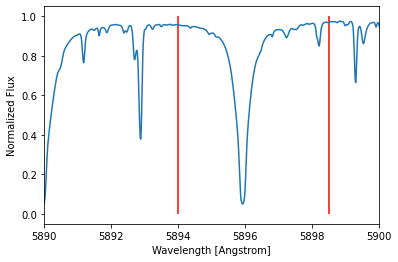

In [3]:
plt.plot(spec["col1"], spec["col2"] / 1e4)
plt.vlines(5894, 0, 1, color="red")
plt.vlines(5898.5, 0, 1, color="red")
plt.xlim(5890, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

### To Find Equivalent Width

In [4]:
ind = np.where((spec["col1"] < 5898.5) & (spec["col1"] > 5894))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("equivalent width (ew) = ", ew, " Angstrom")

equivalent width (ew) =  0.6785890000148121  Angstrom


In [5]:
np.log10(ew / 5890.0)

-3.9385084793712943

## Question 1To Find the Number of Na Atoms in ground state

In [6]:
n_atoms = 10**14.6 / 0.65 / (5890 / 5000)

In [7]:
print(n_atoms)

519925781054586.6


## Question 2 Estimate the # of Sodium Atoms in Excited State Vs. Ground State Using Boltzman Eq.

In [8]:
# First need to calculate a few things
hc = 12400 #12400 eV per angstrom
l = 5890 #wavelength of transition
ChangeinEnergy = (hc/l)  #where l is wavelength

#found online; 2 3s' electrons and 6p'
ratio_boltz = 3*(np.exp((-ChangeinEnergy)/((8.617*10**-5)*(5800))))
print('Here is the ratio of excited to ground state atoms', ratio_boltz) 

Here is the ratio of excited to ground state atoms 0.04443548557837379


## Question 3 Estimate the Ratio of Neutral Sodium Atoms to Ionized Sodium Atoms Using Saha Equation

In [9]:
#calculate some things first
t_star = 5800 * u.K
kT = c.k_B * t_star
h_sq = c.h**2
expo = np.exp(-((5.1*u.eV)/kT))
pe = 1 * u.N / u.m**2
z_1 = 1
z_2 = 2.4

In [10]:
ratio_saha = (2*kT/pe)*(z_1/z_2)*((kT*c.m_e*2*np.pi/h_sq)**1.5)*expo

In [11]:
print('this is the ratio of ionized atoms to neutral atoms', ratio_saha)

this is the ratio of ionized atoms to neutral atoms 2635.1361459832247 kg(3/2) m2 / (J(1/2) N s3)


In [12]:
ratio_saha.decompose()

<Quantity 2635.13614598>

## Question 4 Compute the Total Column Density of Sodium Atoms

In [13]:
sodium_abundance = (n_atoms)*(1+ratio_boltz)*(1+ratio_saha)

print('Here is the column density', sodium_abundance)

Here is the column density 1.4314982054511757e+18


## Question 5 How abundant is this versus hydrogen?

In [14]:
#given
hydrogen_abundance = 6.6*10**23 

In [15]:
ratio_abundance = sodium_abundance/hydrogen_abundance

In [16]:
print(ratio_abundance)

2.168936674926024e-06


In [17]:
#calculating this as an astronomer 
log_abundance = 12+np.log10((sodium_abundance)/(hydrogen_abundance))

In [18]:
print(log_abundance)

6.336246872377648
